# CS579: Lecture 11  

**Seniment Analysis II (Machine Learning)**

*[Dr. Aron Culotta](http://cs.iit.edu/~culotta)*  
*[Illinois Institute of Technology](http://iit.edu)*


Midterm review

~5 True/False, ~6 short answer

Topics:

    Twitter API
        what comes in a tweet?
        how do rate limits work?
        can you understand API documentation?
    graph basics:
        directed/undirected
        path
        cycle
        connected
        connected component
        degree (distribution)
        diameter
        average path length
        clustering coefficient
    modeling networks
        random graphs
        regular graphs
        rewired graphs
        what makes a small world?
    community detection
        girvan-newman (betweenness)
        graph cuts
        representing graphs with matrices
        graph laplacian
    link prediction
        shortest path
        common neighbors
        jaccard
        preferential attachment
        sim rank
        evaluation
    information cascades
        urn experiment
        bayes' theorem for decision making
        game-theoretic model
        maximizing payoff
            cluster density
    sentiment analysis
        lexicon approach
        machine learning

Question types:

    What does this algorithm output?
        E.g., what is jaccard score for a specific link?
        E.g., what is the next step in girvan-newman?
    What does this code do?
        E.g., I give you a new graph-generating algorithm, tell me what it produces
    Write a new algorithm
        E.g., provide pseudo-code the linear-threshold cascade model
    True/False
        E.g., small world graphs have higher clustering coefficients than random graphs.



## What is machine learning?

- [Dietterich: "Machine Learning"](http://web.engr.oregonstate.edu/~tgd/publications/nature-ecs-machine-learning.pdf)
- [Domingos: "A few useful things to know about machine learning"](http://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
<br><br><br><br><br>


## What is machine learning?

"Study of methods for programming computers to learn." 

-- Dietterich

<br><br><br><br><br>


## What is machine learning?

Study of systems that "automatically learn programs from data" 

-- Domingos

<br><br><br><br><br>


## What is machine learning?

A problem-solving technique that solves future problem instances based on
patterns found in past problem instances

<br><br><br><br><br>

![spam](images/spam.png)

<img src='images/search.png' width='50%'/>

<img src='images/netflix.png', width='70%'/>

<img src='images/bw.png' width='50%'/>

<img src='images/chopper.png' width='70%'>

<img src='images/car.jpg' width='70%'/>

![money](images/money.png)

<img src='images/doc.png' width='40%'/>

<img src='images/siri.png' width='40%'/>

<img src='images/watson.png' width='70%'/>

## Notation

- $\vec{x} \in \mathcal{X}$ &nbsp;&nbsp;&nbsp;&nbsp; *instance*, *example*, *input*
  - e.g., an email
- $y \in \mathcal{Y}$ &nbsp;&nbsp;&nbsp;&nbsp; *target*, *class*, *label*, *output*
  - e.g., $y=1$: spam ; $y=0$: not spam
- $f: \mathcal{X} \mapsto \mathcal{Y}$ &nbsp;&nbsp;&nbsp;&nbsp; *hypothesis*, *learner*, *model*, *classifier*
  - e.g., if $x$ contain the word *free*, $y$ is $1$.
  
  <br><br><br><br><br>

## Problem types

- **Classification**
  - $\vec{x}$: image of a person ;  $y$: gender
- **Regression**
  - $\vec{x}$: image of a person ; $y$: age
- **Clustering**
  - $\vec{x}$: images of people ; $y$: cluster id of people that look similar
- **Structured classification**
  - $\vec{x}$: image of a person ; $\vec{y}$: location of their eyes and ears
  - $X$: sequence of images of people ; $Y$: subsequences containing people running
  
  <br><br><br><br><br>

## Workflow

1. **Collect** raw data: emails
2. Manually **categorize** them:  spam or not
3. **Vectorize**: email -> word counts [**features**]
4. **Train** / **Fit**: create $f(x)$
5. **Collect** new raw data
6. **Predict**: compute $f(x)$ for new $x$

<br><br><br><br><br>

## Example: Spam Classification

**Steps 1 & 2: Collect and categorize**

**Spam:**

> Free credit report!


> Free money!


**Not spam:**

> Are you free tonight?

> How are you?


**Step 3: Vectorize**

> 'Free money!'

becomes

```
free: 1
money: 1
!: 1
?: 0
credit: 0
...
```

**Representation**: "Feature engineering is the key" -- Domingos


**Step 4: Train/Fit**

Which model to use?

- Naive Bayes
- Logistic Regression
- Decision Tree
- K-Nearest Neighbors
- Support Vector Machines
- ... many many more

**Steps 5-6: Predict on new data**

> Free vacation!

**Spam**

How do you know if it works?

In [1]:
# X: each row is a feature vector for one document.
X = [(0, 0),
     (1, 0),
     (0,3),
     (1,3)]
# y: element i is a label for ith document
y = [0, 0, 1, 1]

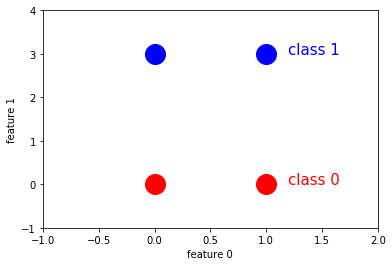

In [2]:
# Plot the data. 
# Red means class 0, blue means class 1.
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(X, y):
    """ Assumes 2-d data. """
    plt.figure()
    for xi, yi in zip(X, y):
        color = 'r' if yi == 0 else 'b'
        plt.plot(xi[0], xi[1], color + 'o', ms=20)
    plt.xlabel('feature 0')
    plt.ylabel('feature 1')
    plt.xlim((-1,2))
    plt.ylim((-1, 4))
    plt.annotate('class 0', xy=(1.2, 0), color='r', size=15)
    plt.annotate('class 1', xy=(1.2, 3), color='b', size=15)
    plt.show()
    
plot_data(X, y)

In [4]:
# Simplest machine learning algorithm:

class SimplestMachine:
    
    def __init__(self):
        self.f = dict()

    def train(self, X, y):
        for xi, yi in zip(X, y):
            self.f[xi] = yi

    def predict(self, x):
        return self.f[x]

# What does this do?









In [5]:
# What does zip do?
[x for x in zip([1, 2, 3], ['a', 'b', 'c', 'd'])]

[(1, 'a'), (2, 'b'), (3, 'c')]

In [6]:
def print_predictions(predictions, y):
    print('pred\ttruth\n' + '\n'.join('%d\t%d' % (p, yi) for p, yi in zip(predictions, y)))

In [7]:
simplest_machine = SimplestMachine()
simplest_machine.train(X, y)
predictions = [simplest_machine.predict(xi) for xi in X]
print_predictions(predictions, y)







pred	truth
0	0
0	0
1	1
1	1


In [8]:
# What does it do for unseen example?
simplest_machine.predict((0, 4))

#ans: because it can't predict anything out of box





KeyError: (0, 4)

In [9]:
# Second simplest machine learning algorithm:
import numpy as np

class SimpleMachine:

    def __init__(self):
        self.f = dict()

    def train(self, X, y):
        for xi, yi in zip(X, y):
            self.f[xi] = yi

    def predict(self, x):
        x_closest = self.find_most_similar(x)
        return self.f[x_closest]
    
    def find_most_similar(self, x):
        distances = [self.distance(x, xi) for xi in self.f.keys()]
        best_idx = np.argmin(distances)
        return list(self.f.keys())[best_idx]

    def distance(self, x, xi):
        return np.sqrt(np.sum((np.array(x)-np.array(xi))**2))
        
# What does this do?

```
Euclidean distance: 

(0, 3)
(1, 5)

sqrt([0-1]^2 + (3-5)^2)
```

In [10]:
simple_machine = SimpleMachine()
simple_machine.train(X, y)
predictions = [simple_machine.predict(xi) for xi in X]
print_predictions(predictions, y)




pred	truth
0	0
0	0
1	1
1	1


In [11]:
# What does it do for unseen example?
simple_machine.predict((0, 4))






1

<img src='images/knn.png' width='80%'/>

<http://www.scholarpedia.org/article/K-nearest_neighbor>


## Generalization

How accurate will I be on a new, unobserved example?

How do you know if it works?

1. Train on data ${\mathcal D_1}$
2. Predict on data ${\mathcal D_2}$
3. Compute accuracy on ${\mathcal D_2}$.
   - Why not ${\mathcal D_1}$?

How do you know if it works?

1. Train on data ${\mathcal D_1}$
2. Predict on data ${\mathcal D_2}$
3. Compute accuracy on ${\mathcal D_2}$.
4. Tweak algorithm / representation
5. Repeat

In [ ]:
#harish: tinkering your algo is okay but for how many times?

How do you know if it works?

1. Train on data ${\mathcal D_1}$
2. Predict on data ${\mathcal D_2}$
3. Compute accuracy on ${\mathcal D_2}$.
4. Tweak algorithm / representation
5. Repeat

How many times can I do this?


## Measuring Generalization

- Cross-validation
  - train on 90%, test on 10%, repeat 10 x's
       - each example appears only once in test set


## Experimental Design

1. Collect data
2. Build model
3. Compute cross-validation accuracy
4. Tune model
5. Repeat


## Experimental Design

1. Collect data
2. Build model
3. Compute cross-validation accuracy
4. Tune model
5. Repeat
6. **Report accuracy on new data**


- What is overfitting? How do you know it is happening? How do you fix?

<img src='images/biasvariance.png' width='70%'/>

<http://scott.fortmann-roe.com/docs/BiasVariance.html>

## Machine Learning for Sentiment Analysis

<br><br><br>
**1.) Collect data: E.g., <http://help.sentiment140.com/for-students>**
<br><br><br>

In [ ]:
#harish: ADM project

In [12]:
# Download Twitter data labeled by sentiment.

from io import BytesIO, StringIO
from zipfile import ZipFile
import urllib.request

# The file is 78M, so this will take a while.
url = urllib.request.urlopen('http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip')
zipfile = ZipFile(BytesIO(url.read()))
# We'll focus on the smaller file that was manually labeled.
# The larger file has 1.6M tweets "pseudo-labeled" using emoticons
tweet_file = zipfile.open('testdata.manual.2009.06.14.csv')

In [13]:
# very useful library for "spreadsheet-like" data analysis operations.
import pandas as pd
"""
Data file format has 6 fields:
0 - the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
1 - the id of the tweet (2087)
2 - the date of the tweet (Sat May 16 23:58:44 UTC 2009)
3 - the query (lyx). If there is no query, then this value is NO_QUERY.
4 - the user that tweeted (robotickilldozr)
5 - the text of the tweet (Lyx is cool)
"""

tweets = pd.read_csv(tweet_file,
                     header=None,
                     names=['polarity', 'id', 'date',
                            'query', 'user', 'text'])
tweets.head()

,polarity,id,date,query,user,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [40]:
tweets.tail()

,polarity,id,date,query,user,text
493,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."
497,0,14076,Sun Jun 14 21:36:17 UTC 2009,iran,captain_pete,Reading the tweets coming out of Iran... The w...


In [41]:
print('read %d tweets' % len(tweets))

read 498 tweets


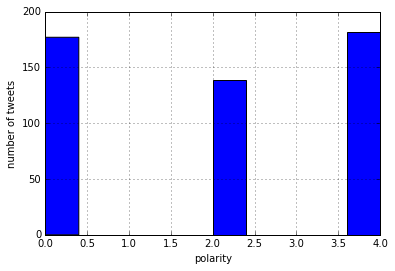

In [42]:
tweets['polarity'].hist()
plt.xlabel('polarity')
plt.ylabel('number of tweets')

In [43]:
# Create label vector (y).
from collections import Counter
y = np.array(tweets['polarity'])
y

array([4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 2, 0, 4, 4, 0, 4, 0, 4, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 4, 2, 2, 0, 2, 4, 4, 4, 0, 4, 2, 4, 2, 0, 0, 4, 4, 4,
       2, 2, 2, 0, 4, 4, 2, 2, 4, 0, 0, 4, 0, 4, 2, 2, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 4, 4, 2, 4, 2, 0, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 4, 2, 0, 0, 2, 4, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 4, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 4, 0, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       2, 4, 2, 0, 0, 0, 0, 0, 0, 2, 0, 4, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 4, 4, 4, 4, 0, 2, 2, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 2, 0, 4, 4, 4, 2, 4, 4, 4, 0, 0, 4, 4, 4,
       4, 4, 4, 2, 0, 0, 0, 2, 2, 4, 0, 4, 4, 4, 4, 4, 0, 0, 4, 4, 0, 0, 0,
       0, 2,

In [87]:
# Create feature vectors (X)
# Here, we just store the number of times each term occurs in each tweet.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))
X = vectorizer.fit_transform(tweets['text'])
print('vectorized %d tweets. found %d terms.' % (X.shape[0], X.shape[1]))

vectorized 498 tweets. found 2264 terms.


In [45]:
type(X)

scipy.sparse.csr.csr_matrix

In [48]:
X.todense()[:2]

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [88]:
# Print part of the vocabulary.
vocab = np.array(vectorizer.get_feature_names())
vocab[:20]

array(['00', '000', '04fo', '10', '100', '1000', '12', '13t7nr', '15mp',
       '16', '16209', '16szl1', '17', '1796', '1988', '19epah', '19j2d',
       '1aikhf', '1st', '1zlff'], 
      dtype='<U40')

In [89]:
# What are the top 10 most frequent terms?
# Sum columns:
col_sums = X.sum(axis=0).A1
# Sort sums in descending order, and return the top 10 indices.
top_indices = np.argsort(col_sums)[::-1][:10]
print('top_indices=', top_indices)

# map index->term
top_terms = vocab[top_indices]
# get counts for top 10 terms
top_term_counts = col_sums[top_indices]
# print
[x for x in zip(top_terms, top_term_counts)]

top_indices= [1961 1998  988 1060  152  209 1062  790 1337 1416]


[('the', 237),
 ('to', 147),
 ('http', 130),
 ('is', 115),
 ('and', 91),
 ('at', 82),
 ('it', 72),
 ('for', 71),
 ('my', 70),
 ('of', 63)]

<br><br><br>
**2.) Build model**
<br><br><br>

Linear Regression:
y = m1*x1 + m2*x2 + b



In [90]:
# Fit a LogisticRegression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
tt = np.array([1,2,3])
xx = np.array([2,3,3])
np.where(tt==xx)

(array([2]),)

In [92]:
# Compute accuracy
def accuracy(truth, predicted):
    return len(np.where(truth==predicted)[0]) / len(truth)

predicted = model.predict(X)
print('accuracy on training data=%.3f' % accuracy(y, predicted))

accuracy on training data=0.996


In [102]:
a = np.arange(10)
a
a[6:3:-1]

array([6, 5, 4])

In [93]:
# What are the top weighted features?

# Get the learned coefficients for the Positive class.
coef = model.coef_[2]
# Sort them in descending order.
top_coef_ind = np.argsort(coef)[::-1][:10]
# Get the names of those features.
top_coef_terms = vocab[top_coef_ind]
# Get the weights of those features
top_coef = coef[top_coef_ind]
# Print the top 10.
print('top weighted terms for positive class:')
[x for x in zip(top_coef_terms, top_coef)]

top weighted terms for positive class:


[('awesome', 1.5207939804767958),
 ('love', 1.5080417103616175),
 ('g2', 1.2252868549798153),
 ('good', 1.1735868088945105),
 ('kindle2', 1.0349501613531902),
 ('lebron', 0.953648523997499),
 ('great', 0.88798751556470601),
 ('mcdonalds', 0.81454565648964972),
 ('tonight', 0.80216396607369378),
 ('mashable', 0.8002958584312525)]

In [103]:
# Get the learned coefficients for the Negative class.
coef = model.coef_[0]
# Sort them in descending order.
top_coef_ind = np.argsort(coef)[::-1][:10]
# Get the names of those features.
top_coef_terms = vocab[top_coef_ind]
# Get the weights of those features
top_coef = coef[top_coef_ind]
# Print the top 10.
print('top weighted terms for negative class:')
[x for x in zip(top_coef_terms, top_coef)]

top weighted terms for negative class:


[('warner', 1.5575574474701563),
 ('hate', 1.2898069199262512),
 ('aig', 1.2761967996219201),
 ('gm', 1.0826104425890997),
 ('korea', 1.061361439980635),
 ('north', 1.061361439980635),
 ('not', 1.0523889298079891),
 ('cheney', 0.93733227107412254),
 ('that', 0.89150593439290238),
 ('fail', 0.8883378090677998)]

In [32]:
# 5-fold cross-validation accuracy
from sklearn.cross_validation import KFold

def do_cross_validation(model, X, y, n_folds):
    cv = KFold(len(y), n_folds)
    accuracies = []
    for train_ind, test_ind in cv:
        model.fit(X[train_ind], y[train_ind])
        predictions = model.predict(X[test_ind])
        accuracies.append(accuracy(y[test_ind], predictions))
    print('Average 5-fold cross validation accuracy=%.2f (std=%.2f)' %
            (np.mean(accuracies), np.std(accuracies)))
    
do_cross_validation(LogisticRegression(), X, y, 5)

Average 5-fold cross validation accuracy=0.67 (std=0.04)


In [104]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
do_cross_validation(KNeighborsClassifier(n_neighbors=1), X, y, 5)

Average 5-fold cross validation accuracy=0.45 (std=0.08)


In [34]:
for i in range (1,11):
    print('\n%d neighbors' % i)
    do_cross_validation(KNeighborsClassifier(n_neighbors=i), X, y, 5)


1 neighbors
Average 5-fold cross validation accuracy=0.45 (std=0.08)

2 neighbors
Average 5-fold cross validation accuracy=0.42 (std=0.05)

3 neighbors
Average 5-fold cross validation accuracy=0.41 (std=0.05)

4 neighbors
Average 5-fold cross validation accuracy=0.47 (std=0.05)

5 neighbors
Average 5-fold cross validation accuracy=0.45 (std=0.05)

6 neighbors
Average 5-fold cross validation accuracy=0.45 (std=0.07)

7 neighbors
Average 5-fold cross validation accuracy=0.46 (std=0.05)

8 neighbors
Average 5-fold cross validation accuracy=0.45 (std=0.07)

9 neighbors
Average 5-fold cross validation accuracy=0.48 (std=0.07)

10 neighbors
Average 5-fold cross validation accuracy=0.48 (std=0.11)
